<a href="https://colab.research.google.com/github/sunandhini96/School_of_AI_Assignment_8/blob/main/sunandini_assignment_8_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sunandhini96/Main_Models.git

Cloning into 'Main_Models'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 238 (delta 71), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (238/238), 71.31 KiB | 2.97 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [2]:
cd /content/Main_Models

/content/Main_Models


In [3]:
!ls

main.py  Models  README.md  utils.py


In [4]:
from Models import *

In [5]:
from main import *

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
!pip install torch_lr_finder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from Models.custom_resnet import CustomResNet,ResBlock

In [8]:
from utils import *

hello
CUDA Available? True


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
torch.Size([60, 3, 32, 32])
Files already downloaded and verified


In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = CustomResNet(ResBlock).to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1,

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm

In [11]:
# loading the dataset
exp = datasets.CIFAR10('./data', train=True, download=True)
exp_data = exp.data

# Calculate the mean and std for normalization
print('[Train]')
print(' - Numpy Shape:', exp_data.shape)
print(' - min:', np.min(exp_data, axis=(0,1,2)) / 255.)
print(' - max:', np.max(exp_data, axis=(0,1,2)) / 255.)
print(' - mean:', np.mean(exp_data, axis=(0,1,2)) / 255.)
print(' - std:', np.std(exp_data, axis=(0,1,2)) / 255.)
print(' - var:', np.var(exp_data, axis=(0,1,2)) / 255.)

Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - min: [0. 0. 0.]
 - max: [1. 1. 1.]
 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]
 - var: [15.56135559 15.11767693 17.44919073]


In [12]:
exp.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

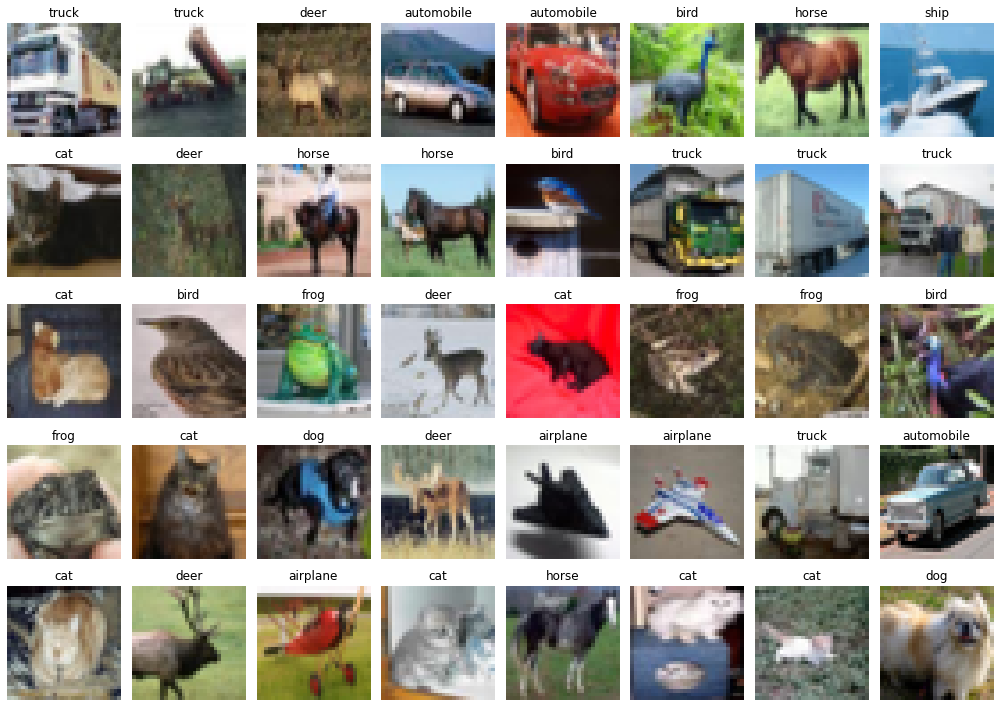

In [13]:
viz_data()


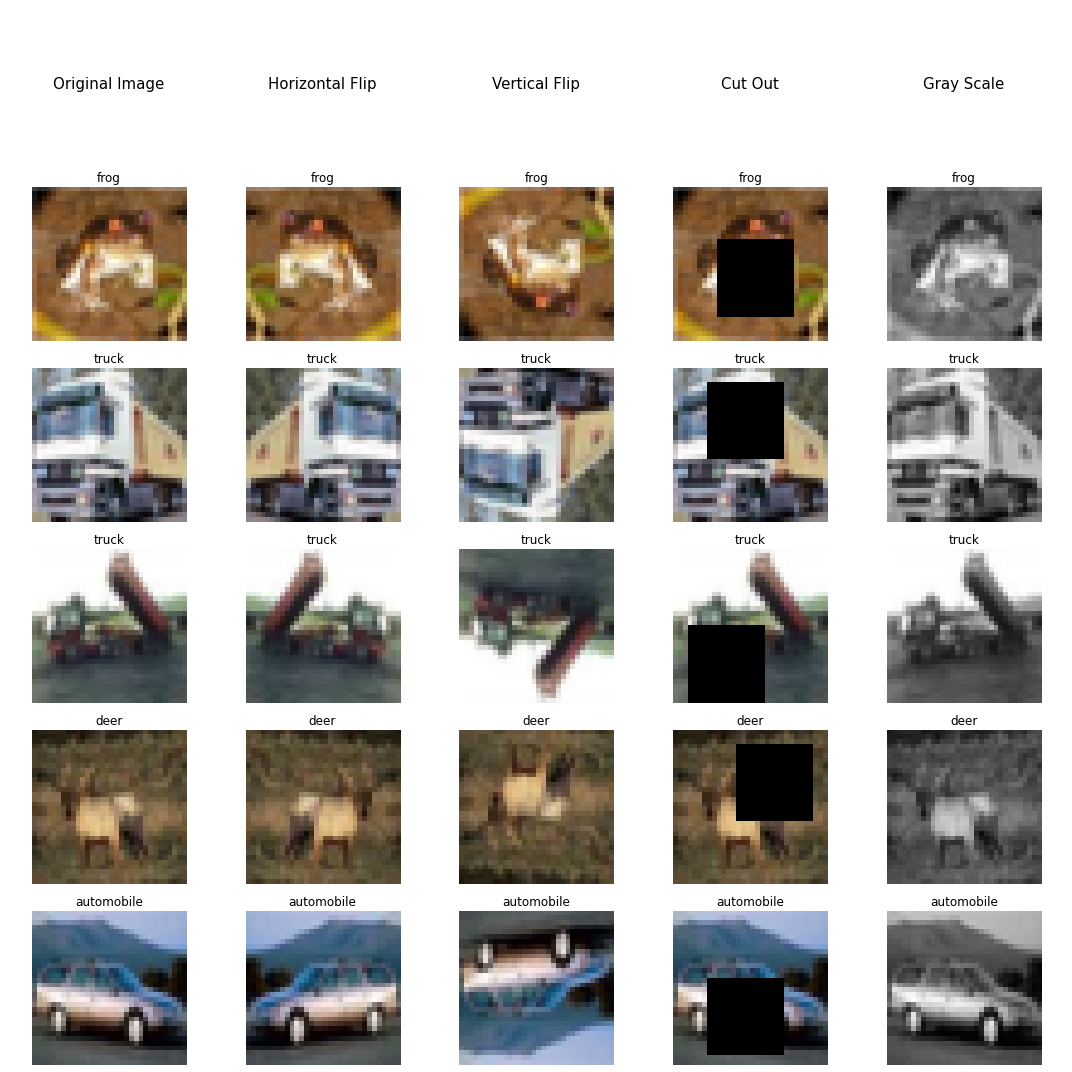

In [14]:
show_images({
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, 
                               min_width=16, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
})

In [15]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=512
else:
    BATCH_SIZE=64

CUDA Available: True


In [16]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.80E-03


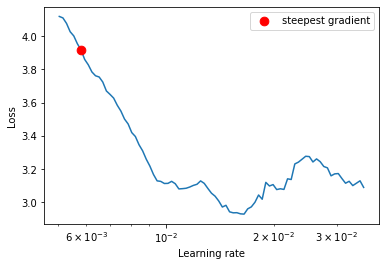

(<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>, 0.005803315113983759)

In [22]:
net4 = CustomResNet(ResBlock).to(device)
import copy
net4_exp = copy.deepcopy(net4)
optimizer = torch.optim.SGD(net4_exp.parameters(), lr=0.004,momentum=0.9)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net4_exp, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=0.04, num_iter=100)
lr_finder.plot() 

In [23]:
min_loss = min(lr_finder.history['loss'])
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print("Max LR is {}".format(ler_rate))

Max LR is 0.016528049600461347


In [24]:
min_lr=ler_rate/10
print("Min LR is {}".format(min_lr))

Min LR is 0.0016528049600461347


In [25]:
Epochs=24
optimizer = torch.optim.SGD(net4.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=ler_rate,
                                                steps_per_epoch=len(train_loader), 
                                                epochs=Epochs,
                                                pct_start=5/Epochs,
                                                div_factor=1000,
                                                three_phase=False, 
                                                final_div_factor=1000,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,
net, history = fit_model(
    net=net4, device=device,
    criterion = nn.CrossEntropyLoss(),
    train_loader=train_loader, test_loader=test_loader,
    optimizer=optimizer, 
    scheduler=scheduler, 
    NUM_EPOCHS=24
)

EPOCH: 1 (LR: 1.6528049600461347e-05)


Batch_id=97 Loss=2.16102 Accuracy=33.97%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 1.2872, Accuracy: 5425/10000 (54.25%)

EPOCH: 2 (LR: 0.0033255855383210477)


Batch_id=97 Loss=1.25395 Accuracy=56.39%: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 1.1301, Accuracy: 6102/10000 (61.02%)

EPOCH: 3 (LR: 0.006634643027041634)


Batch_id=97 Loss=0.99922 Accuracy=65.92%: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]



Test set: Average loss: 0.9654, Accuracy: 6978/10000 (69.78%)

EPOCH: 4 (LR: 0.009943700515762221)


Batch_id=97 Loss=0.86011 Accuracy=71.59%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 0.8331, Accuracy: 7301/10000 (73.01%)

EPOCH: 5 (LR: 0.013252758004482806)


Batch_id=97 Loss=0.76684 Accuracy=74.95%: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]



Test set: Average loss: 0.7657, Accuracy: 7552/10000 (75.52%)

EPOCH: 6 (LR: 0.016519173105793025)


Batch_id=97 Loss=0.62807 Accuracy=79.04%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.6174, Accuracy: 7975/10000 (79.75%)

EPOCH: 7 (LR: 0.01564927662829767)


Batch_id=97 Loss=0.54617 Accuracy=81.49%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.6017, Accuracy: 8106/10000 (81.06%)

EPOCH: 8 (LR: 0.014779380150802317)


Batch_id=97 Loss=0.49277 Accuracy=83.45%: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]



Test set: Average loss: 0.4898, Accuracy: 8396/10000 (83.96%)

EPOCH: 9 (LR: 0.013909483673306963)


Batch_id=97 Loss=0.45259 Accuracy=84.65%: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]



Test set: Average loss: 0.5165, Accuracy: 8386/10000 (83.86%)

EPOCH: 10 (LR: 0.013039587195811607)


Batch_id=97 Loss=0.40146 Accuracy=86.25%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 0.4935, Accuracy: 8420/10000 (84.20%)

EPOCH: 11 (LR: 0.01216969071831625)


Batch_id=97 Loss=0.36043 Accuracy=87.65%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 0.4403, Accuracy: 8520/10000 (85.20%)

EPOCH: 12 (LR: 0.011299794240820896)


Batch_id=97 Loss=0.34210 Accuracy=88.28%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.4702, Accuracy: 8525/10000 (85.25%)

EPOCH: 13 (LR: 0.01042989776332554)


Batch_id=97 Loss=0.29914 Accuracy=89.69%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.4554, Accuracy: 8576/10000 (85.76%)

EPOCH: 14 (LR: 0.009560001285830184)


Batch_id=97 Loss=0.27442 Accuracy=90.49%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.4099, Accuracy: 8689/10000 (86.89%)

EPOCH: 15 (LR: 0.00869010480833483)


Batch_id=97 Loss=0.25012 Accuracy=91.32%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.3972, Accuracy: 8763/10000 (87.63%)

EPOCH: 16 (LR: 0.007820208330839476)


Batch_id=97 Loss=0.23996 Accuracy=91.68%: 100%|██████████| 98/98 [00:28<00:00,  3.50it/s]



Test set: Average loss: 0.4129, Accuracy: 8663/10000 (86.63%)

EPOCH: 17 (LR: 0.006950311853344122)


Batch_id=97 Loss=0.21010 Accuracy=92.60%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.4315, Accuracy: 8716/10000 (87.16%)

EPOCH: 18 (LR: 0.006080415375848766)


Batch_id=97 Loss=0.18128 Accuracy=93.56%: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.3942, Accuracy: 8850/10000 (88.50%)

EPOCH: 19 (LR: 0.00521051889835341)


Batch_id=97 Loss=0.16387 Accuracy=94.28%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.3854, Accuracy: 8818/10000 (88.18%)

EPOCH: 20 (LR: 0.004340622420858056)


Batch_id=97 Loss=0.15176 Accuracy=94.73%: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]



Test set: Average loss: 0.3765, Accuracy: 8871/10000 (88.71%)

EPOCH: 21 (LR: 0.0034707259433626996)


Batch_id=97 Loss=0.12229 Accuracy=95.78%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.3661, Accuracy: 8913/10000 (89.13%)

EPOCH: 22 (LR: 0.0026008294658673454)


Batch_id=97 Loss=0.10996 Accuracy=96.20%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.3618, Accuracy: 8944/10000 (89.44%)

EPOCH: 23 (LR: 0.0017309329883719894)


Batch_id=97 Loss=0.09838 Accuracy=96.69%: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]



Test set: Average loss: 0.3498, Accuracy: 8966/10000 (89.66%)

EPOCH: 24 (LR: 0.0008610365108766352)


Batch_id=97 Loss=0.08552 Accuracy=97.14%: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]



Test set: Average loss: 0.3457, Accuracy: 8987/10000 (89.87%)

